In [62]:
import pandas as pd
import matplotlib.pyplot as plt
def stats(name):
	data = open("clean.csv", 'r')
	matches = pd.read_csv('IPL Matches 2008-2020.csv')
	content = {}

	prev_id = 0
	prev_inn = 0

	for line in data:
		l = line.split(",")
		id = l[0]
		if id == "id": continue
		id = int(id)

		if prev_id != id or prev_inn != l[1]: count = 0    #count is for batting position

		if l[4] == name:
			if id not in content.keys():
				content[id] = [int(l[1]), count, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
				if list(matches.loc[matches['id'] == id]['winner'])[0] == l[16]: content[id][11] = 1    #0 -> loss, 1 -> win

			content[id][2] += int(l[7])   #runs scored

			if int(l[2]) < 6: content[id][8] += int(l[7])    #runs scored in powerplay
			elif int(l[2]) > 15: content[id][10] += int(l[7])    #runs scored in death overs
			else: content[id][9] += int(l[7])    #runs scored in middle overs

			if l[15] != "wides": content[id][3] += 1   #balls faced

			if content[id][3] <= 20: content[id][12] += int(l[7])
			elif content[id][3] <= 30: content[id][13] += int(l[7])
			else: content[id][14] += int(l[7])

			if int(l[7]) == 4 and l[10] == "0": content[id][15] += 1
			if int(l[7]) == 6 and l[10] == "0": content[id][16] += 1

		if l[13] == name:
			if id not in content.keys():
				content[id] = [int(l[1]), count, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
				if list(matches.loc[matches['id'] == id]['winner'])[0] == l[16]: content[id][11] = 1
			content[id][5] = 1    #0 -> not out, 1 -> out

		if l[11] == "1": count += 1    #number of players out before batsman came to bat

		prev_id = id
		prev_inn = l[1]

	data.close()

	for id in content.keys():
		if content[id][3] > 0: content[id][4] = float("{:.2f}".format(100*content[id][2]/content[id][3]))
		else: content[id][4] = -1

		if content[id][2] >= 100: content[id][7] = 1
		elif content[id][2] >= 50: content[id][6] = 1

		if content[id][3] > 0: content[id][12] = float("{:.2f}".format(100*content[id][12]/max(content[id][3], 20)))
		else: content[id][12] = -1

		if content[id][3] > 20: content[id][13] = float("{:.2f}".format(100*content[id][13]/max(content[id][3]-20, 10)))
		else: content[id][13] = -1

		if content[id][3] > 30: content[id][14] = float("{:.2f}".format(100*content[id][14]/(content[id][3]-30)))
		else: content[id][14] = -1

	return content

In [63]:
def str_first_twenty_plot(name):
    content = stats(name)
    str_first_twenty = []
    for id in content.keys():
        if((content[id][1] == 4 or content[id][1] == 5 or content[id][1] == 6) and content[id][3] >= 20):
            str_first_twenty.append(content[id][12])
    return str_first_twenty

def str_after_thirty_plot(name):
    content = stats(name)
    str_first_twenty = []
    for id in content.keys():
        if((content[id][1] == 5 or content[id][1] == 6) and content[id][3] > 30):
            str_first_twenty.append(content[id][14])
    return str_first_twenty

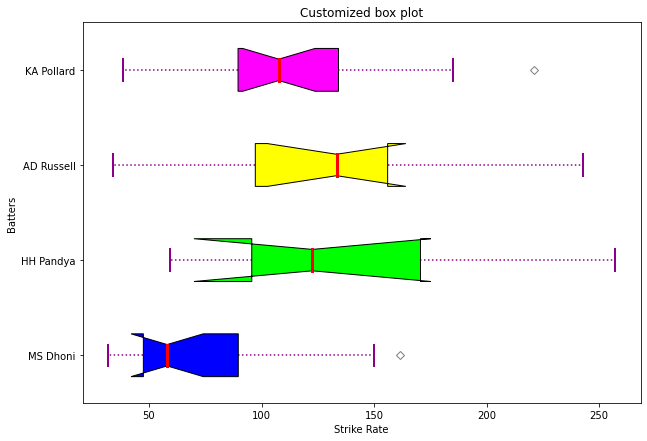

In [64]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
data = [str_first_twenty_plot("MS Dhoni"),str_first_twenty_plot("HH Pandya"),str_first_twenty_plot("AD Russell"),str_first_twenty_plot("KA Pollard")] 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00', 
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# y-axis labels
ax.set_yticklabels(['MS Dhoni', 'HH Pandya', 'AD Russell','KA Pollard'])

# Adding title
plt.title("Customized box plot")
plt.xlabel('Strike Rate')
plt.ylabel('Batters')
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show(bp)